In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from skimage.feature import hog,blob_dog
from skimage import data, exposure
from math import sqrt

In [2]:
def show_classimage(Train,c,cname):

    cls=Train[ Train['level']== c]
    print(cls)
    print( cls['image'].iloc[3] )
    
    fpath0= "dbase/"+ cls['image'].iloc[0] +".jpeg" 
    fpath1= "dbase/"+ cls['image'].iloc[1] +".jpeg" 
    fpath2= "dbase/"+ cls['image'].iloc[2] +".jpeg" 
    fpath3= "dbase/"+ cls['image'].iloc[3] +".jpeg" 
    
    im0 = np.array(Image.open(fpath0),dtype="uint8")
    im1 = np.array(Image.open(fpath1),dtype="uint8")
    im2 = np.array(Image.open(fpath2),dtype="uint8")
    im3 = np.array(Image.open(fpath3),dtype="uint8")

    fig = plt.figure()    
    ax1 = fig.add_subplot(221)
    plt.imshow(im0)
    ax1.title.set_text(cname +" : Sample 1" )
    
    ax2 = fig.add_subplot(222)
    plt.imshow(im1)
    ax2.title.set_text(cname +" :Sample 2" )
    
    ax3 = fig.add_subplot(223)
    plt.imshow(im2)
    ax3.title.set_text(cname +" :Sample 3" )    
    
    ax4 = fig.add_subplot(224)
    plt.imshow(im3)
    ax4.title.set_text(cname +" :Sample 4" )
    plt.show()

In [3]:
def regionofinteret(fpath):

    thresh = 10 
    im = np.array(Image.open(fpath0),dtype="uint8")
    rmsk =  im0[:,:,0] > thresh  & im0[:,:,1] > thresh & im0[:,:,2] > thresh   
    img = rgb2gray(im)
    return [img,rmsk]

In [4]:
def hogfeatures(Train,c):
    
    cls=Train[ Train['level']== c]
    print(cls)
    print( cls['image'].iloc[3] )
    
    fpath0= "dbase/"+ cls['image'].iloc[0] +".jpeg" 
    
    image = np.array(Image.open(fpath0),dtype="uint8")
    
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

In [5]:
def dogfeatures(Train,c):
    
    cls=Train[ Train['level']== c]
    print(cls)
    print( cls['image'].iloc[3] )
    
    fpath0= "dbase/"+ cls['image'].iloc[0] +".jpeg" 
    image = np.array(Image.open(fpath0),dtype="uint8")
    
    image_gray = rgb2gray(image)
    blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
    
        

    fig, ax = plt.subplots(1, 1, figsize=(9, 3), sharex=True, sharey=True)
    
    
    #for idx, (blobs, color, title) in enumerate(sequence):
    ax.set_title('Difference of Gaussian')
    ax.imshow(image)
    for blob in blobs_dog:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
        ax.add_patch(c)
    ax.set_axis_off()

    plt.tight_layout()
    plt.show()

In [6]:
Labels = pd.read_csv('Labels.csv')
cls = ("No DR", "Mild",  "Moderate",  "Severe", "Proliferative DR")
dcls = {cls[0]:0, cls[1]:1, cls[2]:2, cls[3]:3, cls[4]:4 }

In [7]:
print ('\nDataset :  Retinapathy ')
print('Class \t Count \n')
print( cls[0],"\t", np.sum( Labels['level']== dcls[cls[0]]  ) )
print( cls[1],"\t", np.sum( Labels['level']== dcls[cls[1]])  )
print( cls[2],"\t", np.sum( Labels['level']== dcls[cls[2]])  )

print( cls[3],"\t", np.sum( Labels['level']== dcls[cls[3]]) )
print( cls[4],"\t", np.sum( Labels['level']== dcls[cls[4]]) )


Dataset :  Retinapathy 
Class 	 Count 

No DR 	 622
Mild 	 46
Moderate 	 117
Severe 	 18
Proliferative DR 	 21


In [8]:
ts =0.9

msk = np.random.rand(len(Labels)) < ts

Train = Labels[msk]
Test = Labels[~msk]


print('Training Dataset ')
print(Train)

print('Testing Dataset ')
print(Test)

Training Dataset 
          image  level
0       10_left      0
1      10_right      0
2       13_left      0
3      13_right      0
4       15_left      1
..          ...    ...
819   997_right      1
820    998_left      0
821   998_right      0
822   1000_left      0
823  1000_right      0

[744 rows x 2 columns]
Testing Dataset 
         image  level
11    19_right      0
34     42_left      0
42     51_left      2
61    64_right      0
73    73_right      0
..         ...    ...
773  947_right      0
780   960_left      2
782   963_left      0
785  966_right      0
801  979_right      0

[80 rows x 2 columns]


          image  level
0       10_left      0
1      10_right      0
2       13_left      0
3      13_right      0
8       17_left      0
..          ...    ...
818    997_left      0
820    998_left      0
821   998_right      0
822   1000_left      0
823  1000_right      0

[561 rows x 2 columns]
13_right


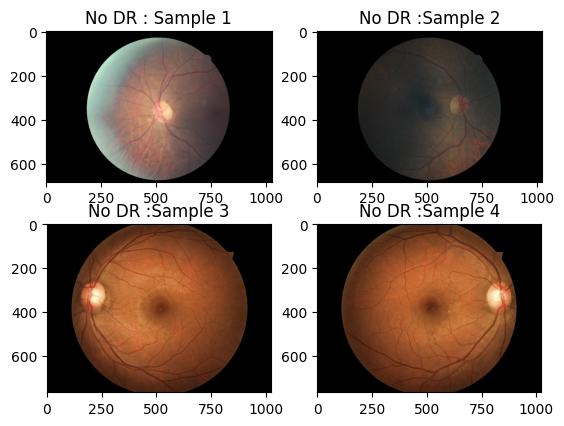

         image  level
4      15_left      1
9     17_right      1
22     30_left      1
28     36_left      1
102   114_left      1
103  114_right      1
150   178_left      1
173  204_right      1
180   214_left      1
196   227_left      1
200   231_left      1
211  240_right      1
257  301_right      1
272   320_left      1
296   348_left      1
297  348_right      1
317  374_right      1
337  393_right      1
360   417_left      1
361  417_right      1
366   421_left      1
378   435_left      1
379  435_right      1
421  487_right      1
451  525_right      1
452   527_left      1
472   560_left      1
476   566_left      1
477  566_right      1
479  568_right      1
495  607_right      1
547  669_right      1
572   696_left      1
597  728_right      1
632   766_left      1
633  766_right      1
689  844_right      1
704   869_left      1
705  869_right      1
795  971_right      1
798   978_left      1
799  978_right      1
814   992_left      1
819  997_right      1
36_left


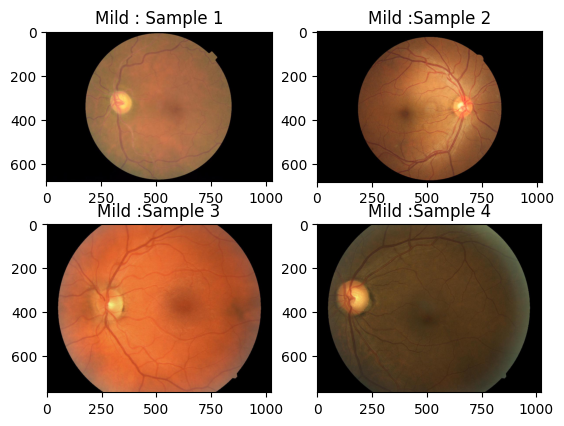

         image  level
5     15_right      2
23    30_right      2
30     40_left      2
46     54_left      2
47    54_right      2
..         ...    ...
772   947_left      2
781  960_right      2
794   971_left      2
807  985_right      2
809  986_right      2

[105 rows x 2 columns]
54_left


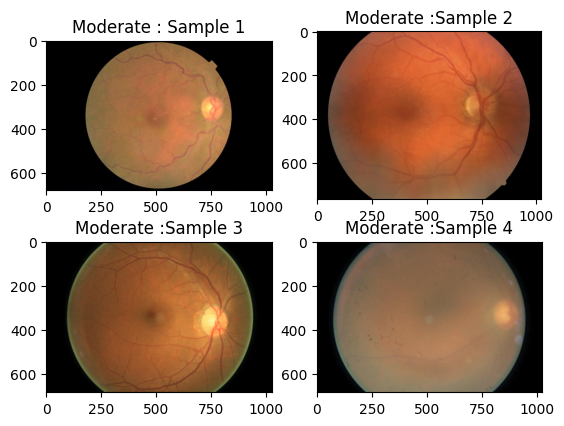

         image  level
91    99_right      3
134   163_left      3
135  163_right      3
283  328_right      3
300   352_left      3
301  352_right      3
335  391_right      3
402   458_left      3
440   509_left      3
456   531_left      3
457  531_right      3
496   609_left      3
556   679_left      3
566   687_left      3
567  687_right      3
755  932_right      3
328_right


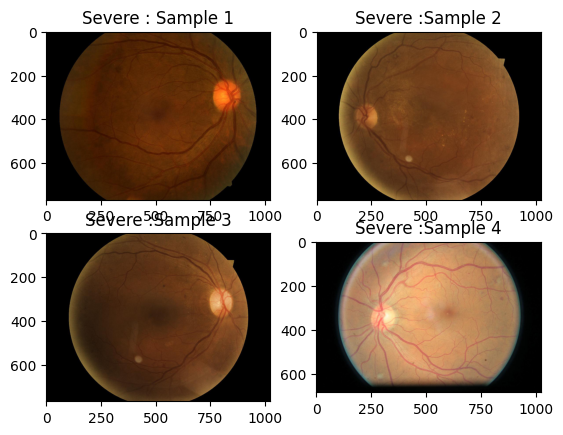

         image  level
6      16_left      4
7     16_right      4
184   217_left      4
185  217_right      4
253  294_right      4
281  326_right      4
314   367_left      4
315  367_right      4
350   405_left      4
351  405_right      4
352   406_left      4
353  406_right      4
385  439_right      4
403  458_right      4
548   670_left      4
549  670_right      4
760   936_left      4
808   986_left      4
217_right


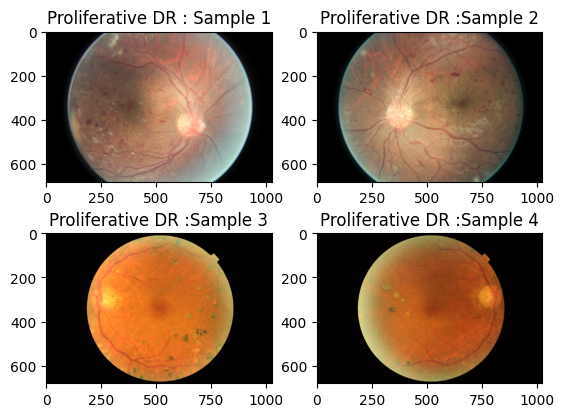

In [9]:
show_classimage(Train,dcls[cls[0]],cls[0])
show_classimage(Train,dcls[cls[1]],cls[1])
show_classimage(Train,dcls[cls[2]],cls[2])
show_classimage(Train,dcls[cls[3]],cls[3])
show_classimage(Train,dcls[cls[4]],cls[4])

          image  level
0       10_left      0
1      10_right      0
2       13_left      0
3      13_right      0
8       17_left      0
..          ...    ...
818    997_left      0
820    998_left      0
821   998_right      0
822   1000_left      0
823  1000_right      0

[561 rows x 2 columns]
13_right


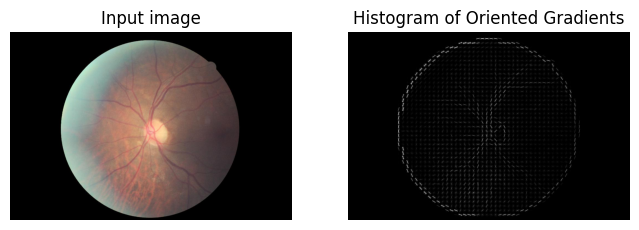

In [10]:
hogfeatures(Train,dcls[cls[0]])

          image  level
0       10_left      0
1      10_right      0
2       13_left      0
3      13_right      0
8       17_left      0
..          ...    ...
818    997_left      0
820    998_left      0
821   998_right      0
822   1000_left      0
823  1000_right      0

[561 rows x 2 columns]
13_right


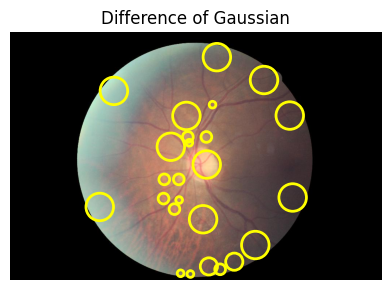

In [11]:
dogfeatures(Train,dcls[cls[0]])

In [12]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage.color import rgb2gray
from skimage.feature import hog, blob_dog
from skimage import data, exposure
from math import sqrt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from os import path

In [13]:
def show_classimage(Train,c,cname):

    cls=Train[ Train['level']== c]
    print(cls)
    print( cls['image'].iloc[3] )
    
    fpath0= "dbase/"+ cls['image'].iloc[0] +".jpeg" 
    fpath1= "dbase/"+ cls['image'].iloc[1] +".jpeg" 
    fpath2= "dbase/"+ cls['image'].iloc[2] +".jpeg" 
    fpath3= "dbase/"+ cls['image'].iloc[3] +".jpeg" 
    
    im0 = np.array(Image.open(fpath0),dtype="uint8")
    im1 = np.array(Image.open(fpath1),dtype="uint8")
    im2 = np.array(Image.open(fpath2),dtype="uint8")
    im3 = np.array(Image.open(fpath3),dtype="uint8")

    fig = plt.figure()    
    ax1 = fig.add_subplot(221)
    plt.imshow(im0)
    ax1.title.set_text(cname +" : Sample 1" )
    
    ax2 = fig.add_subplot(222)
    plt.imshow(im1)
    ax2.title.set_text(cname +" :Sample 2" )
    
    ax3 = fig.add_subplot(223)
    plt.imshow(im2)
    ax3.title.set_text(cname +" :Sample 3" )    
    
    ax4 = fig.add_subplot(224)
    plt.imshow(im3)
    ax4.title.set_text(cname +" :Sample 4" )
    plt.show()

In [14]:
def regionofinteret(fpath):

    thresh = 15 
    im = np.array(Image.open(fpath),dtype="uint8")
    rmsk =  im[:,:,0] > thresh  & im[:,:,1] > thresh & im[:,:,2] > thresh   
    img = rgb2gray(im)
    return [img,rmsk]

In [15]:
def hogfeatures2(base,fname):

    fpath= base + fname+".jpeg" 
    im = np.array(Image.open(fpath),dtype="uint8")
    fd, hog_image = hog(im, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)
                    
    hfc, hbin = np.histogram(fd, bins=64,range=(0.0,1.0))
    hfp = hfc[1:]/ np.sum(hfc[1:])    
    return hfp

In [16]:
def hogfeatures(Train,c):
    
    cls=Train[ Train['level']== c]
    print(cls)
    print( cls['image'].iloc[3] )
    
    fpath0= "dbase/"+ cls['image'].iloc[0] +".jpeg" 
    
    image = np.array(Image.open(fpath0),dtype="uint8")
    
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show()

In [17]:
def dogfeatures2(base, fname):
    
    fpath0= base+ fname +".jpeg" 
    image = np.array(Image.open(fpath0),dtype="uint8")
    
    image_gray = rgb2gray(image)
    blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
    
    image2 = np.zeros(image_gray.shape);
    
    
    for blob in blobs_dog:
        y, x, r = blob
        y1= round(y-r)
        y2= round(y+r)
        x1 = round(x-r)
        x2= round(x+r)        
        image2[y1:y2, x1:x2] = 255
       
    image2 = image2 > 0     
    RGB=image[image2,:] 
    RGB = RGB/255;
    
    
    hfc, bin_edges = np.histogram(RGB[:,0],  bins=22,range=(0,1)) 
    hfc2, bin_edges = np.histogram(RGB[:,1],  bins=22,range=(0,1)) 
    hfc3, bin_edges = np.histogram(RGB[:,2],  bins=22,range=(0,1)) 
        
    hfp = hfc[1:]/ np.sum(hfc[1:])    
    hfp2 = hfc2[1:]/ np.sum(hfc2[1:])    
    hfp3 = hfc3[1:]/ np.sum(hfc3[1:])    
    
    hfp = np.concatenate((hfp, hfp2,hfp3),axis=0)                
    return hfp

In [18]:
def readfeatures(cls,K):
    
    hfc1 = np.zeros([K,63]);
    hfc2 = np.zeros([K,63]);    
    
    for num,fname in enumerate(cls['image'],start=0):            
        hfc1[num,:]=hogfeatures2("dbase/",fname)      
        hfc2[num,:]=dogfeatures2("dbase/",fname)    
        if ( num+1 >= K ):
            break;
            
    hfc = np.concatenate((hfc1, hfc2),axis=1)            
    return hfc

In [19]:
def normalize(vdata):     
    ncols = vdata.shape[1]  
    mx = np.zeros(ncols)
    mn = np.zeros(ncols) 
    for c in range(ncols):
        mx[c]=np.max(vdata[:,c])
        mn[c]=np.min(vdata[:,c])               
        vdata[:,c] = ( np.double(vdata[:,c]) - mn[c] ) / ( mx[c] - mn[c])    
    return vdata,mx,mn

In [20]:
def dogfeatures(Train,c):
    
    cls=Train[ Train['level']== c]
    print(cls)
    print( cls['image'].iloc[3] )
    
    fpath0= "dbase/"+ cls['image'].iloc[0] +".jpeg" 
    image = np.array(Image.open(fpath0),dtype="uint8")
    
    image_gray = rgb2gray(image)
    blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
    blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)
    
        

    fig, ax = plt.subplots(1, 1, figsize=(9, 3), sharex=True, sharey=True)
    
    
    #for idx, (blobs, color, title) in enumerate(sequence):
    ax.set_title('Difference of Gaussian')
    ax.imshow(image)
    for blob in blobs_dog:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)

        ax.add_patch(c)
    ax.set_axis_off()

    plt.tight_layout()
    plt.show()

In [21]:
Labels = pd.read_csv('Labels.csv')
cls = ("No DR", "Mild",  "Moderate",  "Severe", "Proliferative DR")
dcls = {cls[0]:0, cls[1]:1, cls[2]:2, cls[3]:3, cls[4]:4 }

print ('\nDataset :  Retinapathy ')
print('Class \t Count \n')
print( cls[0],"\t", np.sum( Labels['level']== dcls[cls[0]]  ) )
print( cls[1],"\t", np.sum( Labels['level']== dcls[cls[1]])  )
print( cls[2],"\t", np.sum( Labels['level']== dcls[cls[2]])  )

print( cls[3],"\t", np.sum( Labels['level']== dcls[cls[3]]) )
print( cls[4],"\t", np.sum( Labels['level']== dcls[cls[4]]) )


Dataset :  Retinapathy 
Class 	 Count 

No DR 	 622
Mild 	 46
Moderate 	 117
Severe 	 18
Proliferative DR 	 21


In [22]:
if (  not path.exists('features.npy')  ) : 

    K=10;
    ydata0=np.zeros([1,K]);
    cls0=Labels[ Labels['level']== dcls[cls[0]] ]
    xdata0=readfeatures(cls0,K)


    K=10;
    ydata1=np.ones([1,K]);
    cls1=Labels[ Labels['level']== dcls[cls[1]] ]
    xdata1=readfeatures(cls1,K)

    K=10;
    ydata2=np.ones([1,K])*2;
    cls2=Labels[ Labels['level']== dcls[cls[2]] ]
    xdata2=readfeatures(cls2,K)

    K=10;
    ydata3=np.ones([1,K])*3;
    cls3=Labels[ Labels['level']== dcls[cls[3]] ]
    xdata3=readfeatures(cls3,K)

    K=10;
    ydata4=np.ones([1,K])*4;
    cls4=Labels[ Labels['level']== dcls[cls[4]] ]
    xdata4=readfeatures(cls4,K)

    Xdata = np.concatenate((xdata0,xdata1,xdata2,xdata3,xdata4),axis=0)        
    Ydata = np.concatenate((ydata0,ydata1,ydata2,ydata3,ydata4),axis=1)    
    
    with open('features.npy', 'wb') as fh:
         np.save(fh, Xdata)
         np.save(fh, Ydata)
    
else :
    with open('features.npy', 'rb') as fh:
        Xdata = np.load(fh)
        Ydata= np.load(fh)

In [23]:
print(Xdata.shape)
print(Ydata.shape)

(50, 126)
(1, 50)


In [24]:
Ydata=np.ravel(Ydata)
Ydata = Ydata.astype(int)
Xtrain,Xtest,Ytrain,Ytest =train_test_split(Xdata,Ydata,test_size=0.2,random_state=1)

In [25]:
print('\n\n Training Dataset ')
print(Xtrain.shape)
print(Ytrain.shape)



 Training Dataset 
(40, 126)
(40,)


In [26]:
print('\n\n Testing Dataset ')
print(Xtest.shape)
print(Ytest.shape)



 Testing Dataset 
(10, 126)
(10,)


In [27]:
clf = MLPClassifier(solver='adam', activation='relu',alpha=1e-4,hidden_layer_sizes=[60,40,20], random_state=1,max_iter=100,learning_rate_init=.01).fit(Xtrain, Ytrain)
Yp=clf.predict(Xtrain)
print('\n classification performance : Training');
print(classification_report(Ytrain,Yp,target_names=cls) );


 classification performance : Training
                  precision    recall  f1-score   support

           No DR       1.00      1.00      1.00         8
            Mild       1.00      1.00      1.00        10
        Moderate       1.00      1.00      1.00         8
          Severe       1.00      1.00      1.00         7
Proliferative DR       1.00      1.00      1.00         7

        accuracy                           1.00        40
       macro avg       1.00      1.00      1.00        40
    weighted avg       1.00      1.00      1.00        40



In [28]:
Yp=clf.predict(Xtest)
print('\n classification performance : Testing');
print(classification_report(Ytest,Yp,target_names=cls) );


 classification performance : Testing
                  precision    recall  f1-score   support

           No DR       1.00      1.00      1.00         2
            Mild       0.00      0.00      0.00         0
        Moderate       0.50      0.50      0.50         2
          Severe       0.50      0.33      0.40         3
Proliferative DR       0.67      0.67      0.67         3

        accuracy                           0.60        10
       macro avg       0.53      0.50      0.51        10
    weighted avg       0.65      0.60      0.62        10



C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
clf = MLPClassifier(solver='adam', activation='relu', alpha=1e-4,
                    hidden_layer_sizes=[100, 50, 25], random_state=1,
                    max_iter=500, learning_rate_init=0.001).fit(Xtrain, Ytrain)

Yp = clf.predict(Xtrain)
print('\n classification performance : Training');
print(classification_report(Ytrain, Yp, target_names=cls));

Yp = clf.predict(Xtest)
print('\n classification performance : Testing');
print(classification_report(Ytest, Yp, target_names=cls));



 classification performance : Training
                  precision    recall  f1-score   support

           No DR       1.00      1.00      1.00         8
            Mild       1.00      1.00      1.00        10
        Moderate       1.00      1.00      1.00         8
          Severe       1.00      1.00      1.00         7
Proliferative DR       1.00      1.00      1.00         7

        accuracy                           1.00        40
       macro avg       1.00      1.00      1.00        40
    weighted avg       1.00      1.00      1.00        40


 classification performance : Testing
                  precision    recall  f1-score   support

           No DR       1.00      0.50      0.67         2
            Mild       0.00      0.00      0.00         0
        Moderate       0.50      0.50      0.50         2
          Severe       0.33      0.33      0.33         3
Proliferative DR       1.00      0.67      0.80         3

        accuracy                           0.5

C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# NB

In [30]:
nb = GaussianNB()
nb.fit(Xtrain, Ytrain)
Yp = nb.predict(Xtest)
print('\nClassification performance: Testing (Naive Bayes)')
print(classification_report(Ytest, Yp, target_names=cls))

# Train and evaluate Multinomial Naive Bayes (MNB) Classifier
mnb = MultinomialNB()
mnb.fit(Xtrain, Ytrain)
Yp = mnb.predict(Xtest)
print('\nClassification performance: Testing (Multinomial Naive Bayes)')
print(classification_report(Ytest, Yp, target_names=cls))


Classification performance: Testing (Naive Bayes)
                  precision    recall  f1-score   support

           No DR       0.00      0.00      0.00         2
            Mild       0.00      0.00      0.00         0
        Moderate       1.00      0.50      0.67         2
          Severe       0.50      0.67      0.57         3
Proliferative DR       0.50      0.67      0.57         3

        accuracy                           0.50        10
       macro avg       0.40      0.37      0.36        10
    weighted avg       0.50      0.50      0.48        10


Classification performance: Testing (Multinomial Naive Bayes)
                  precision    recall  f1-score   support

           No DR       0.00      0.00      0.00         2
            Mild       0.00      0.00      0.00         0
        Moderate       0.00      0.00      0.00         2
          Severe       0.00      0.00      0.00         3
Proliferative DR       1.00      0.33      0.50         3

        acc

C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GK\AppDat

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

# Load data
df = pd.read_csv('Labels1.csv')

# Split data into training and test sets
train, test = train_test_split(df, test_size=0.1, stratify=df['level'], random_state=42)

# Extract HOG features for training and test sets
def extract_hog_features(data):
    X = []
    y = []
    for c in range(5):
        cls = data[data['level'] == c]
        for fname in cls['image']:
            features = hogfeatures2("dbase/", fname)
            X.append(features)
            y.append(c)
    return X, y

X_train, y_train = extract_hog_features(train)
X_test, y_test = extract_hog_features(test)

# Train KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(X_train, y_train)

# Train Gaussian Naive Bayes classifier
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

# Train Multinomial Naive Bayes classifier
mnb_clf = MultinomialNB()
mnb_clf.fit(X_train, y_train)

# Train Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

def calculate_weights(distances, k):
    weights = np.zeros(distances.shape)
    weights[distances.argsort()[:k]] = 1
    return weights

def weighted_knn(X_train, y_train, X_test, k):
    y_pred = np.zeros(len(X_test))
    for i, x_test in enumerate(X_test):
        distances = np.linalg.norm(X_train - x_test, axis=1)
        weights = calculate_weights(distances, k)
        class_counts = np.bincount(y_train, weights=weights)
        y_pred[i] = np.argmax(class_counts)
    return y_pred

adaboost_wknn_clf = AdaBoostClassifier(base_estimator=None, n_estimators=50)
adaboost_wknn_clf.fit(X_train, y_train)

# Train AdaBoost classifier with Multinomial Naive Bayes as base estimator
adaboost_mnb_clf = AdaBoostClassifier(base_estimator=mnb_clf, n_estimators=50)
adaboost_mnb_clf.fit(X_train, y_train)

# Train AdaBoost classifier with Random Forest as base estimator
adaboost_rf_clf = AdaBoostClassifier(base_estimator=rf_clf, n_estimators=50)
adaboost_rf_clf.fit(X_train, y_train)

# Evaluate performance on test set for KNN classifier
y_pred_knn = knn_clf.predict(X_test)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Evaluate performance on test set for Gaussian Naive Bayes classifier
y_pred_gnb = gnb_clf.predict(X_test)
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))

# Evaluate performance on test set for Multinomial Naive Bayes classifier
y_pred_mnb = mnb_clf.predict(X_test)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_mnb))

# Evaluate performance on test set for Random Forest classifier
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Evaluate performance on test set for AdaBoost classifier with KNN
# y_pred_adaboost_knn = adaboost_knn_clf.predict(X_test)
# print("AdaBoost with KNN Classification Report:")
# print(classification_report(y_test, y_pred_adaboost_knn))

# Evaluate performance on test set for AdaBoost classifier with Multinomial Naive Bayes
y_pred_adaboost_mnb = adaboost_mnb_clf.predict(X_test)
print("AdaBoost with Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_adaboost_mnb))

# Evaluate performance on test set for AdaBoost classifier with Random Forest
y_pred_adaboost_rf = adaboost_rf_clf.predict(X_test)
print("AdaBoost with Random Forest Classification Report:")
print(classification_report(y_test, y_pred_adaboost_rf))

y_pred_adaboost_wknn = weighted_knn(X_train, y_train, X_test, k=5)
print("AdaBoost with WKNN Classification Report:")
print(classification_report(y_test, y_pred_adaboost_wknn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        36
           1       0.00      0.00      0.00         3
           2       1.00      0.29      0.44         7
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2

    accuracy                           0.76        49
   macro avg       0.35      0.25      0.26        49
weighted avg       0.70      0.76      0.69        49

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.47      0.62        36
           1       0.17      0.33      0.22         3
           2       0.20      0.29      0.24         7
           3       0.00      0.00      0.00         1
           4       0.20      0.50      0.29         2

    accuracy                           0.43        49
   macro avg       0.29      0.32      0.27        49
weight

C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedM

C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\GK\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\G

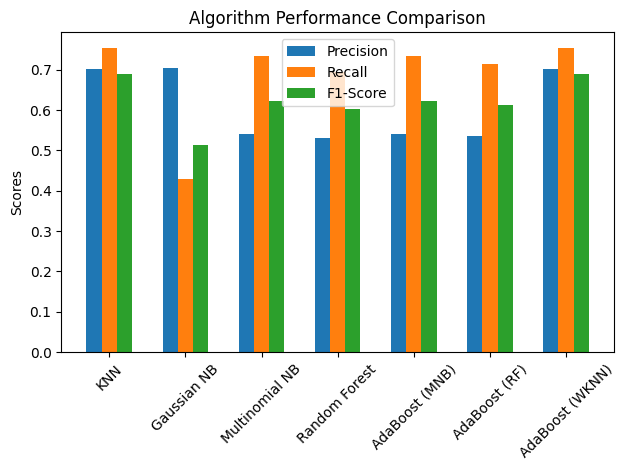

In [34]:
import matplotlib.pyplot as plt

# Classification reports
knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
gnb_report = classification_report(y_test, y_pred_gnb, output_dict=True)
mnb_report = classification_report(y_test, y_pred_mnb, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
adaboost_mnb_report = classification_report(y_test, y_pred_adaboost_mnb, output_dict=True)
adaboost_rf_report = classification_report(y_test, y_pred_adaboost_rf, output_dict=True)
adaboost_wknn_report = classification_report(y_test, y_pred_adaboost_wknn, output_dict=True)

# Extract precision, recall, and f1-score for each algorithm
algorithms = ['KNN', 'Gaussian NB', 'Multinomial NB', 'Random Forest', 'AdaBoost (MNB)', 'AdaBoost (RF)', 'AdaBoost (WKNN)']
precision = [knn_report['weighted avg']['precision'], gnb_report['weighted avg']['precision'],
             mnb_report['weighted avg']['precision'], rf_report['weighted avg']['precision'],
             adaboost_mnb_report['weighted avg']['precision'], adaboost_rf_report['weighted avg']['precision'],
             adaboost_wknn_report['weighted avg']['precision']]
recall = [knn_report['weighted avg']['recall'], gnb_report['weighted avg']['recall'],
          mnb_report['weighted avg']['recall'], rf_report['weighted avg']['recall'],
          adaboost_mnb_report['weighted avg']['recall'], adaboost_rf_report['weighted avg']['recall'],
          adaboost_wknn_report['weighted avg']['recall']]
f1_score = [knn_report['weighted avg']['f1-score'], gnb_report['weighted avg']['f1-score'],
            mnb_report['weighted avg']['f1-score'], rf_report['weighted avg']['f1-score'],
            adaboost_mnb_report['weighted avg']['f1-score'], adaboost_rf_report['weighted avg']['f1-score'],
            adaboost_wknn_report['weighted avg']['f1-score']]

# Plotting the graph
x = range(len(algorithms))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x, precision, width, label='Precision')
rects2 = ax.bar([val + width for val in x], recall, width, label='Recall')
rects3 = ax.bar([val + width * 2 for val in x], f1_score, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Algorithm Performance Comparison')
ax.set_xticks([val + width for val in x])
ax.set_xticklabels(algorithms, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

# Evaluate performance on test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.69


Linear Regression

In [101]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
clf = LinearRegression()
clf.fit(X_train, y_train)

# Evaluate performance on test set
y_pred = clf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 1.11


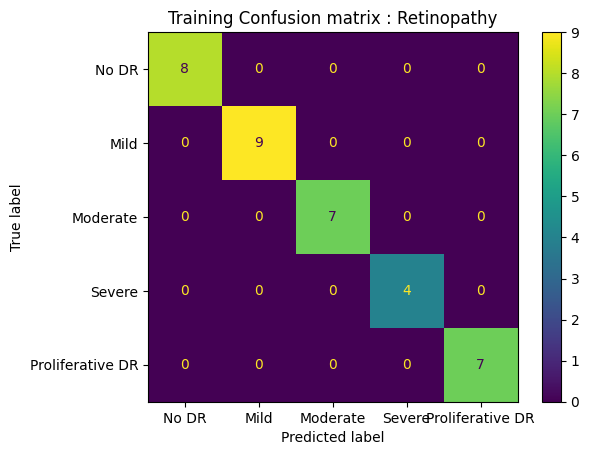

In [34]:
conf = ConfusionMatrixDisplay.from_estimator(clf, Xtrain, Ytrain,display_labels=cls) 
conf.ax_.set_title('Training Confusion matrix : Retinopathy')
plt.show()

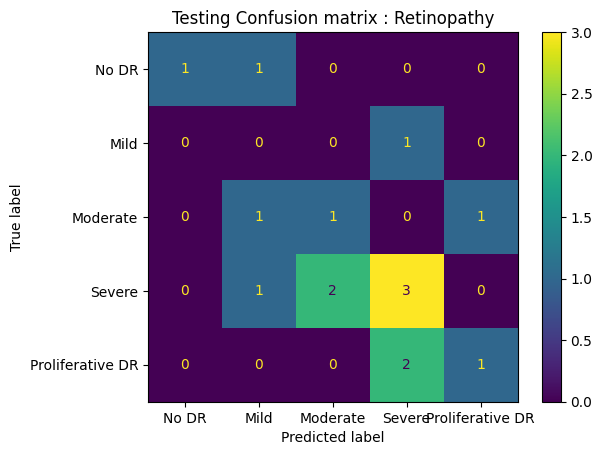

In [35]:
conf = ConfusionMatrixDisplay.from_estimator(clf, Xtest, Ytest,display_labels=cls) 
conf.ax_.set_title('Testing Confusion matrix : Retinopathy')
plt.show()